In [1]:
from cds_data_fetch import *
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

import numpy as np
import wrds

import config
from pathlib import Path
import cds_processing
import plot_interest_rates
from plot_interest_rates import plot_interest_rates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import cds_processing
from cds_processing import calc_cds_monthly
import plot_cds
from plot_cds import cds_spread_plot
import calc_cds_returns
from calc_cds_returns import calc_cds_return 
from calc_cds_returns import calc_difference
from calc_cds_returns import *


### Interest rates

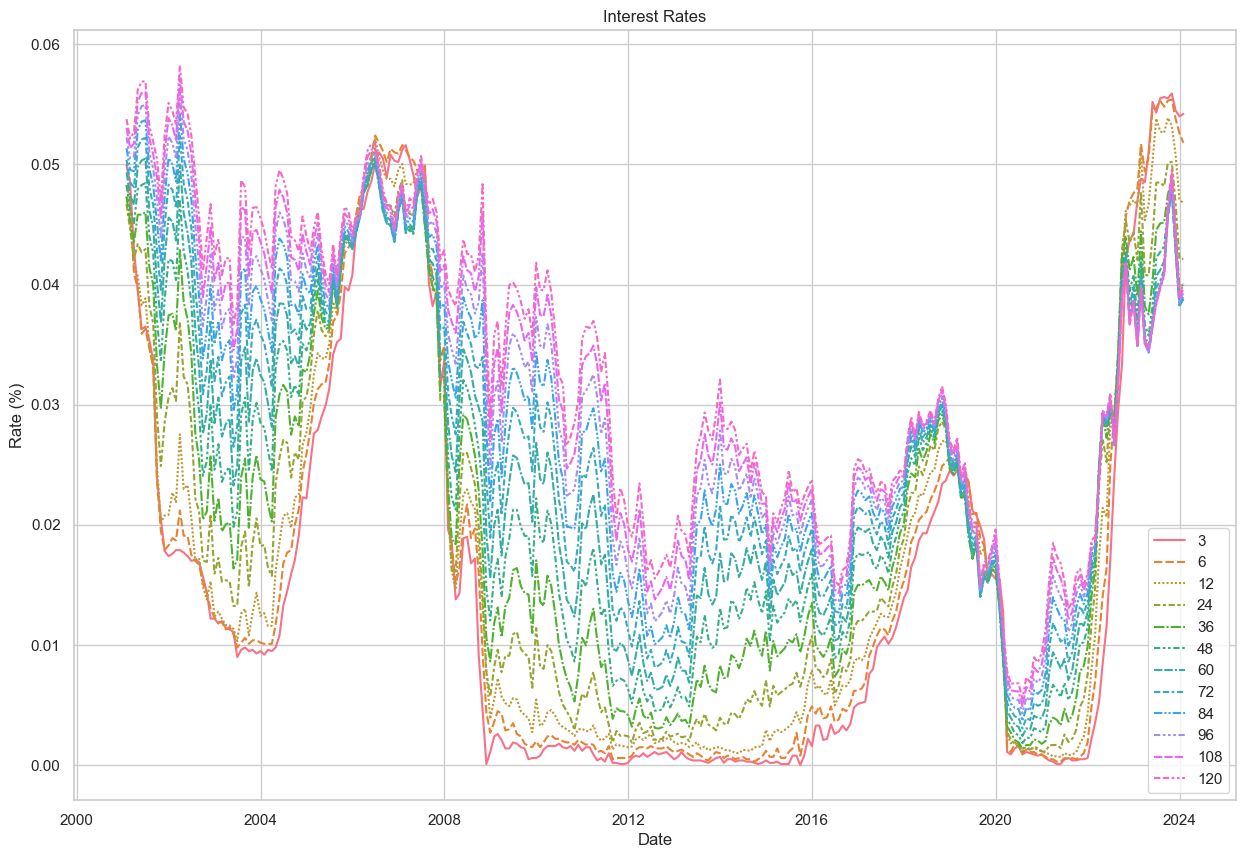

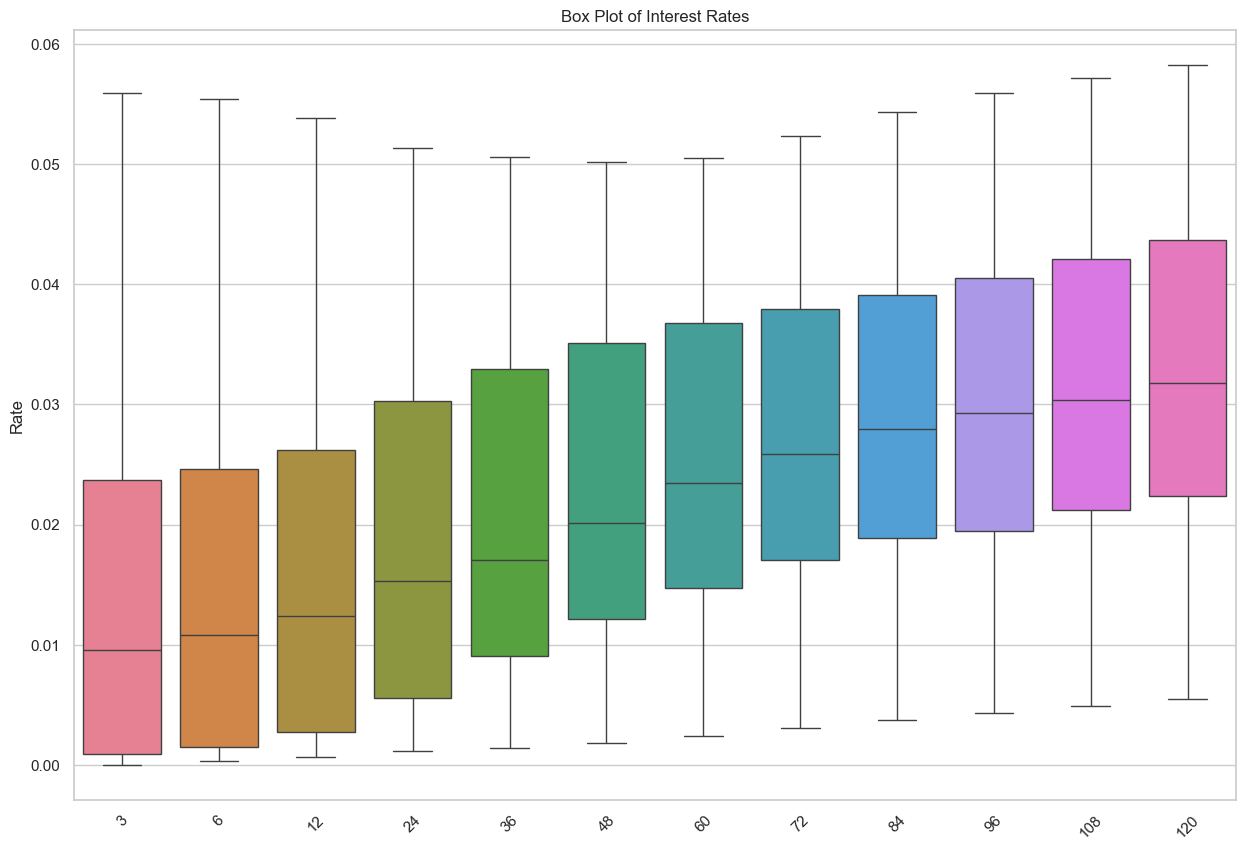

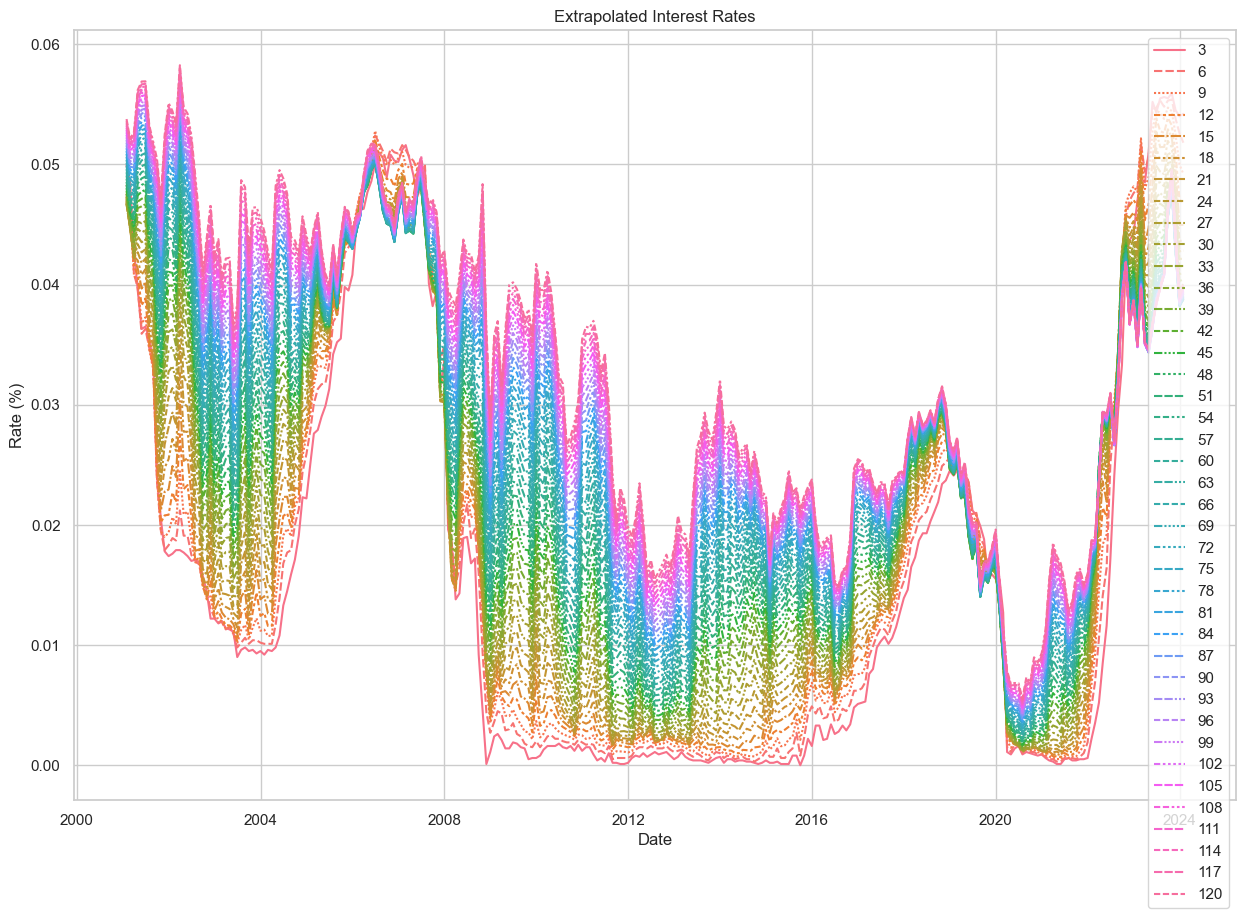

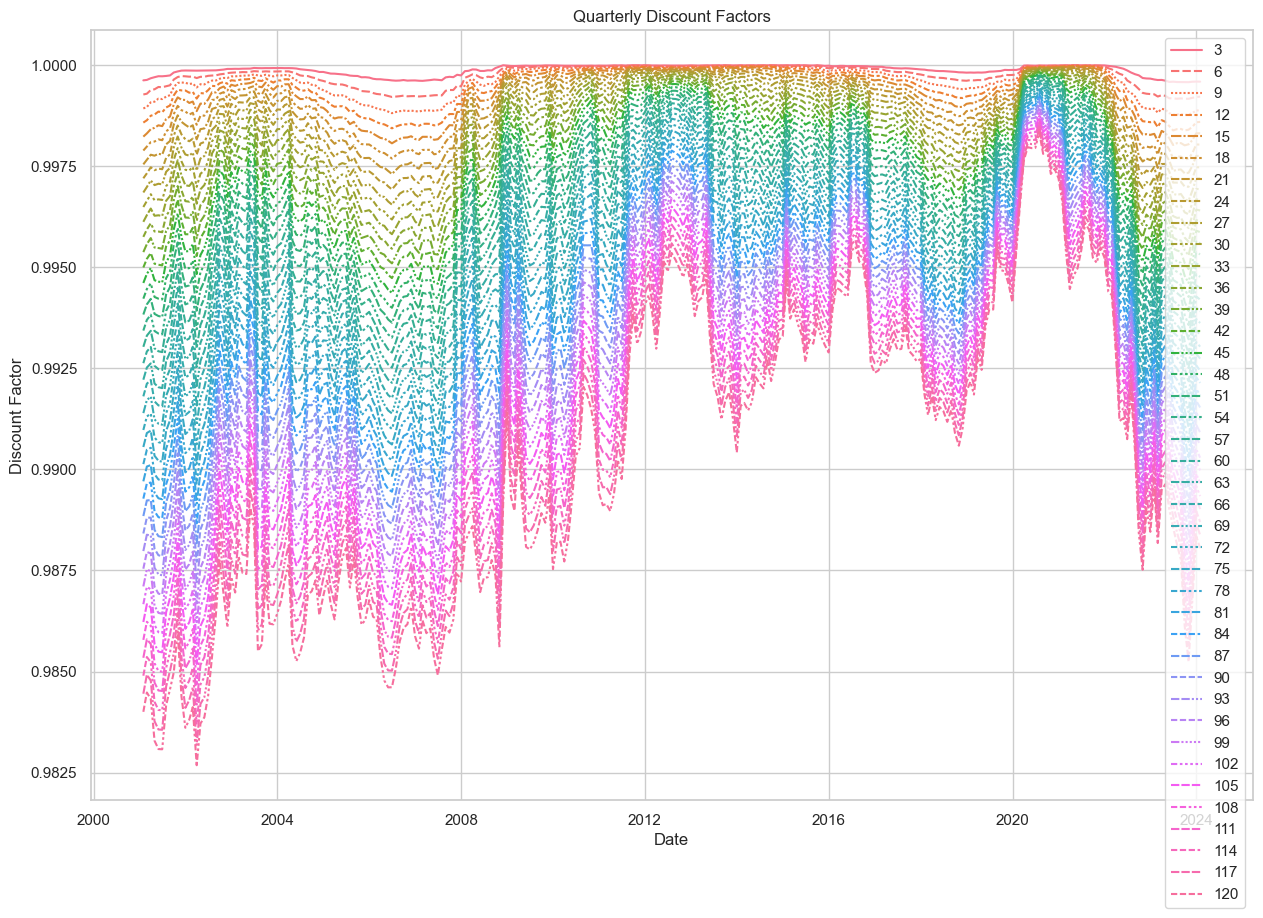

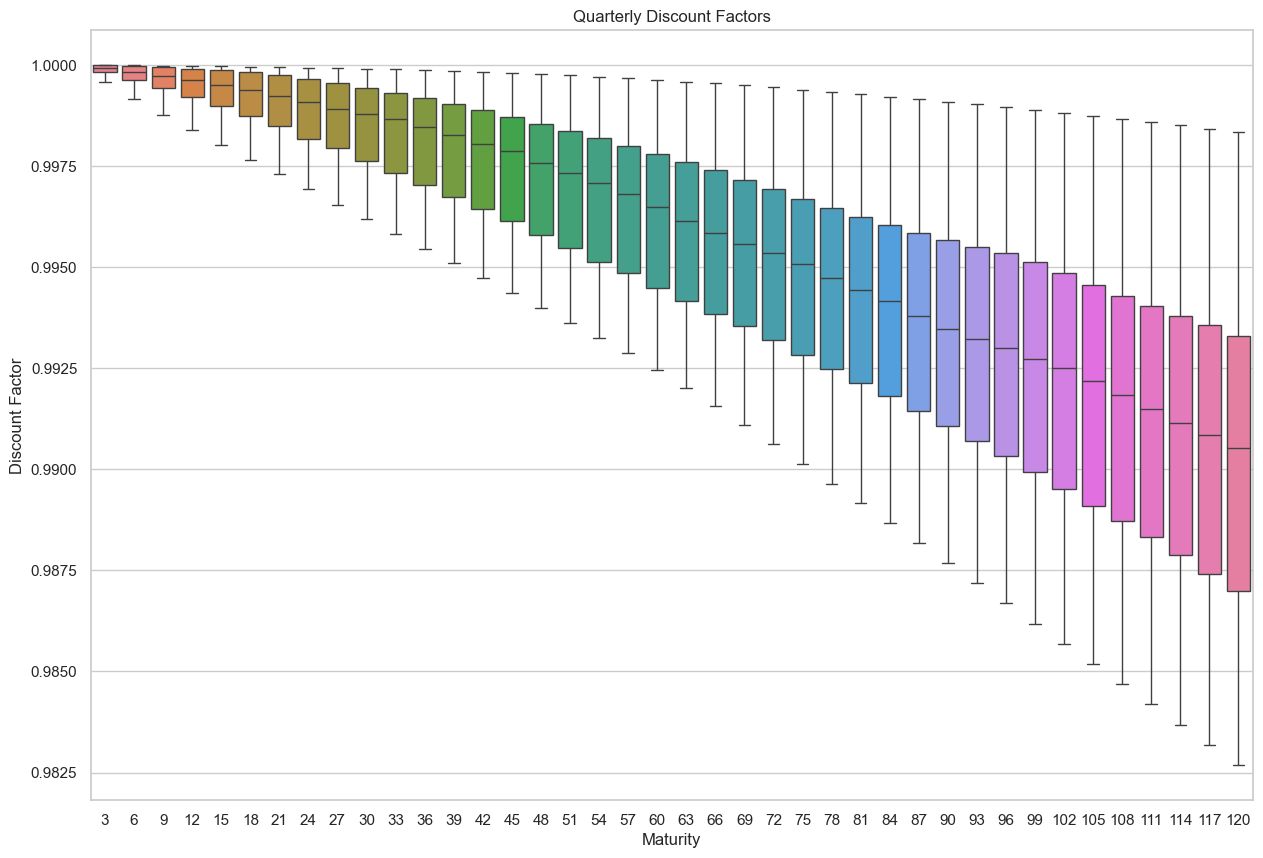

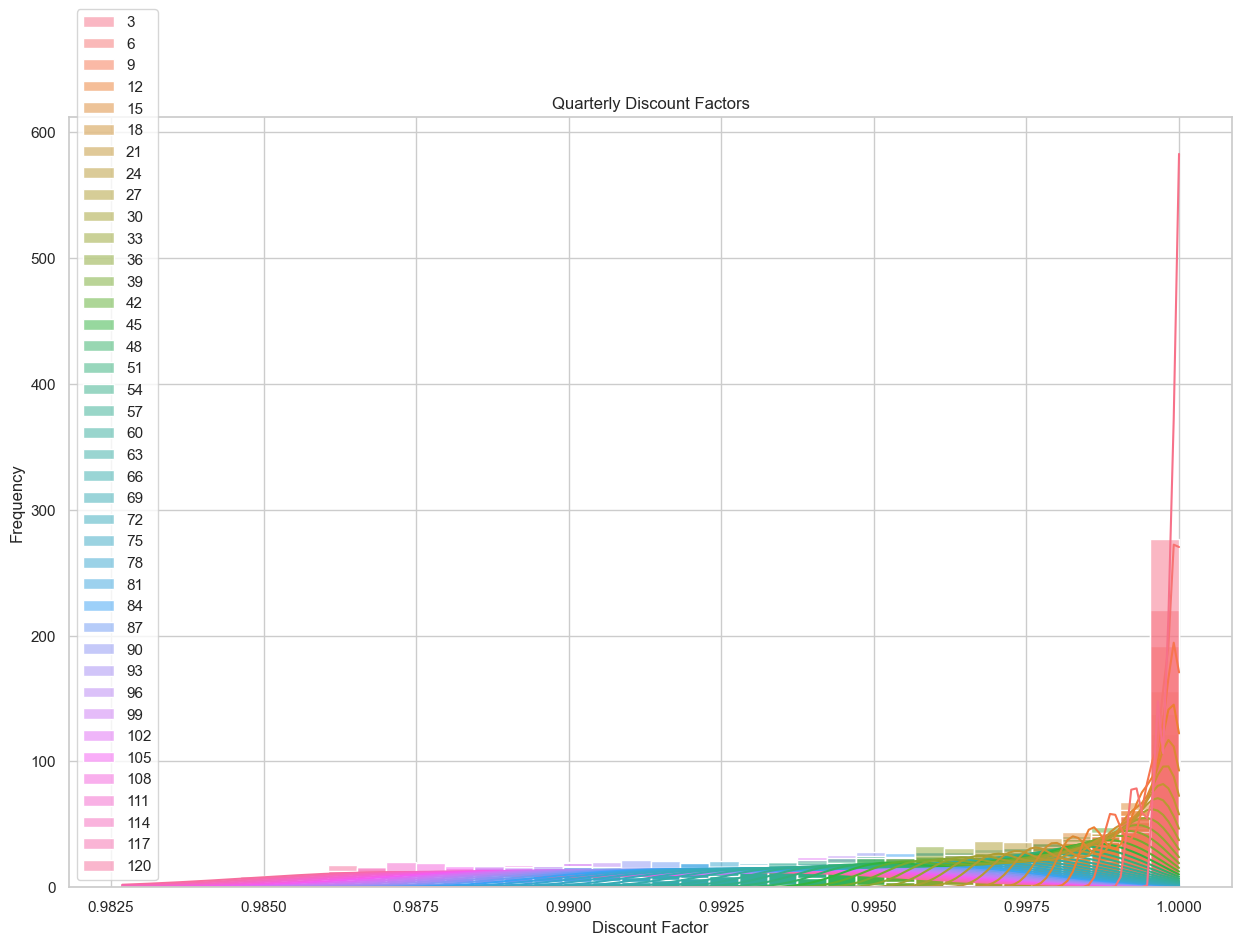

              3           6           9           12          15          18   \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     0.999884    0.999753    0.999615    0.999477    0.999332    0.999180   
std      0.000129    0.000260    0.000384    0.000497    0.000606    0.000715   
min      0.999581    0.999170    0.998770    0.998386    0.998018    0.997666   
25%      0.999822    0.999631    0.999432    0.999214    0.998988    0.998752   
50%      0.999928    0.999838    0.999741    0.999628    0.999517    0.999382   
75%      0.999993    0.999978    0.999952    0.999917    0.999873    0.999823   
max      1.000000    0.999996    0.999989    0.999980    0.999969    0.999956   

              21          24          27          30   ...         93   \
count  277.000000  277.000000  277.000000  277.000000  ...  277.000000   
mean     0.999020    0.998851    0.998674    0.998489  ...    0.993098   
std      0.000823    0.000928    0.001029    0.0

In [3]:
start_date = '2001-01-02'
end_date = '2024-01-31'
plot_interest_rates(start_date=start_date, end_date=end_date)

### Credit default swaps (CDS) spread

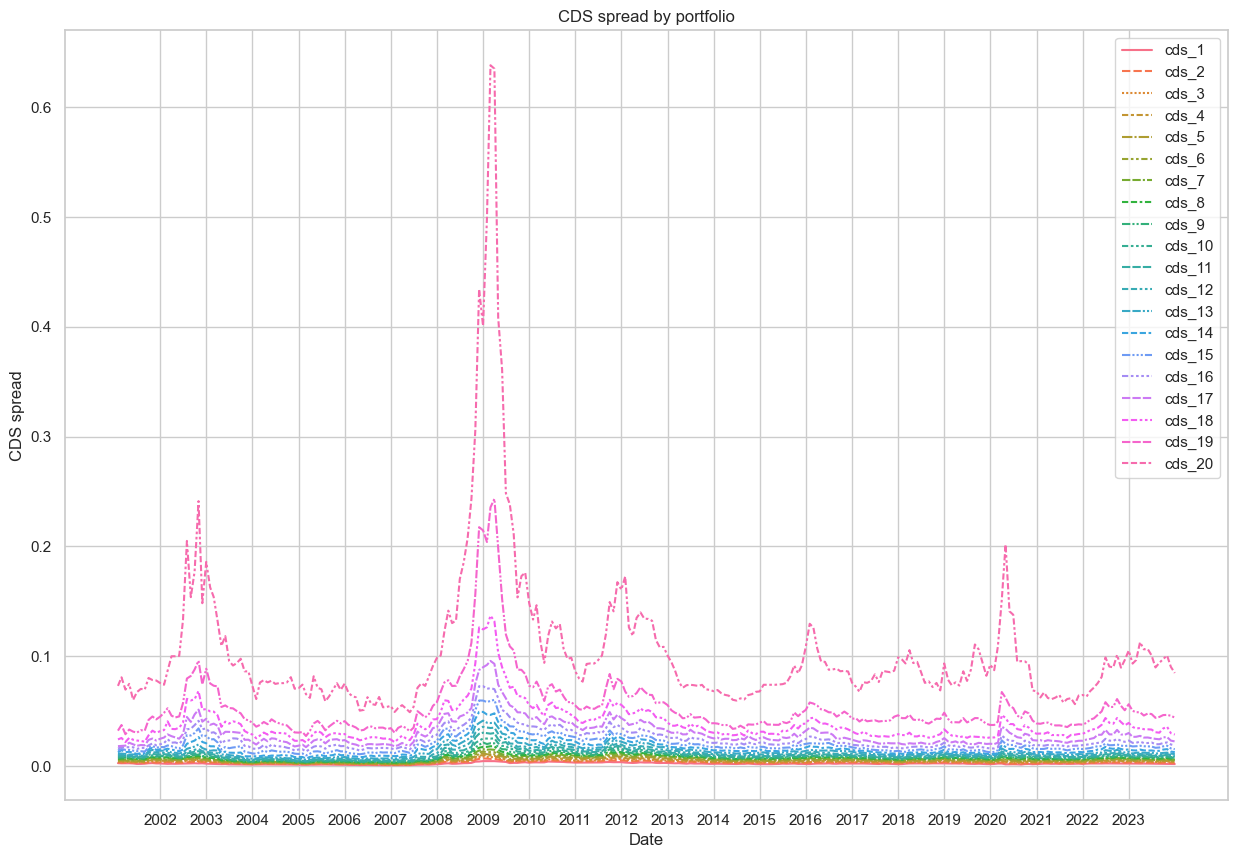

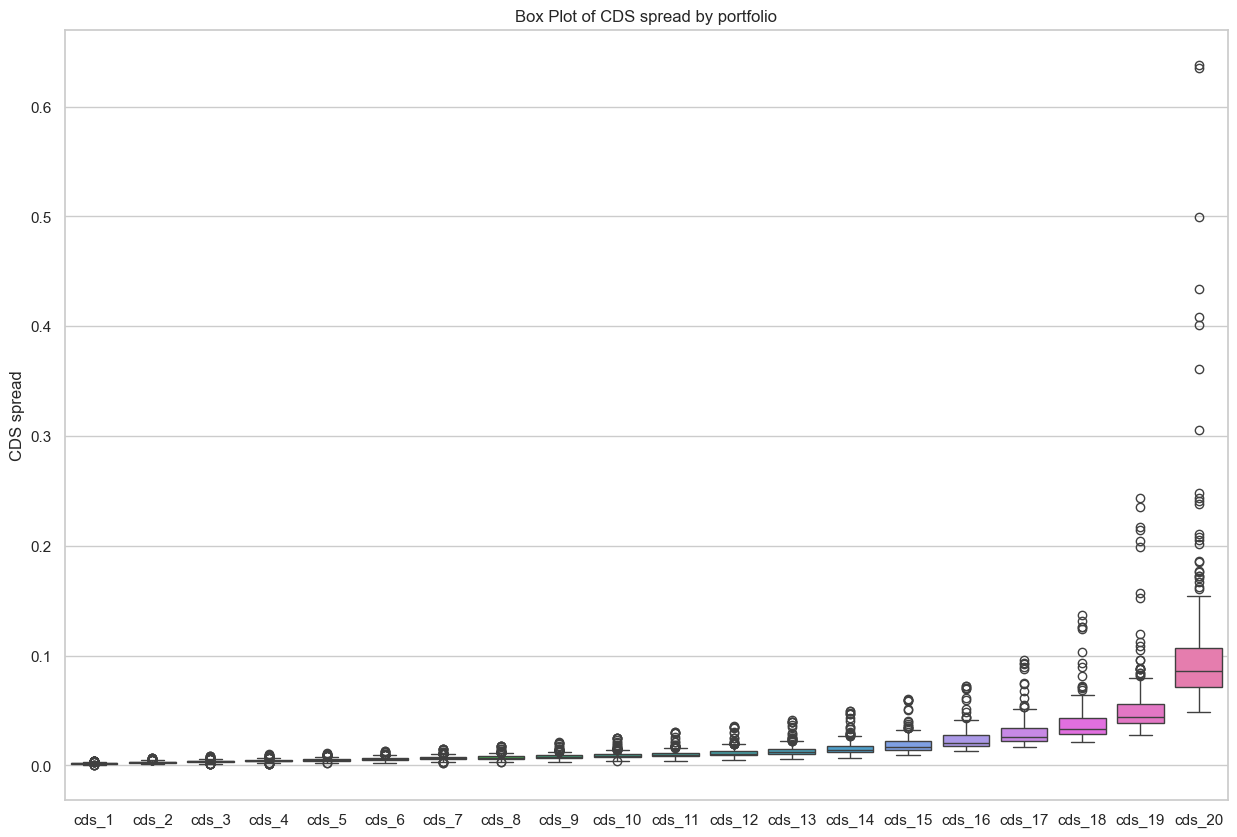

            cds_1       cds_2       cds_3       cds_4       cds_5       cds_6  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.002196    0.003099    0.003773    0.004429    0.005129    0.005838   
std      0.000768    0.001051    0.001275    0.001505    0.001764    0.002043   
min      0.000734    0.001067    0.001341    0.001622    0.001917    0.002258   
25%      0.001771    0.002524    0.003180    0.003756    0.004293    0.004879   
50%      0.002139    0.003002    0.003645    0.004288    0.004994    0.005670   
75%      0.002441    0.003505    0.004252    0.005003    0.005855    0.006649   
max      0.004500    0.006983    0.008767    0.009995    0.011750    0.013398   

            cds_7       cds_8       cds_9      cds_10      cds_11      cds_12  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.006592    0.007403    0.008270    0.009241    0.010376    0.011801   
std      0.002332    0.0027

In [4]:
cds_spread_plot(start_date=start_date, end_date=end_date)

# CDS returns estimation

In [3]:
start_date = '2001-01-02'
end_date = '2012-12-31'
returns_mean_2012 = calc_cds_return(start_date=start_date, end_date=end_date,Method ='mean')
returns_median_2012 = calc_cds_return(start_date=start_date, end_date=end_date,Method ='median')
returns_weighted_2012 = calc_cds_return(start_date=start_date, end_date=end_date,Method ='weighted')

In [4]:
returns_mean_2012

cds_1     cds_2     cds_3     cds_4     cds_5     cds_6  \
Date                                                                     
2001-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2001-02-28 -0.000559 -0.001093 -0.000429 -0.000276 -0.000663  0.000121   
2001-03-31 -0.000256 -0.000174 -0.001139 -0.001300 -0.002126 -0.001696   
2001-04-30 -0.000193 -0.000262 -0.000499 -0.000445 -0.001047 -0.001723   
2001-05-31 -0.000665 -0.000998 -0.001402 -0.001267 -0.001247 -0.001384   
...              ...       ...       ...       ...       ...       ...   
2012-07-31 -0.000729 -0.000901 -0.001621 -0.001876 -0.001868 -0.002268   
2012-08-31 -0.000705 -0.001156 -0.001283 -0.001849 -0.002168 -0.002259   
2012-09-30 -0.000784 -0.001482 -0.002166 -0.002698 -0.002929 -0.002847   
2012-10-31 -0.001102 -0.001344 -0.001141 -0.001713 -0.002357 -0.002394   
2012-11-30  0.000569  0.000340  0.000448  0.000466  0.000553  0.000585   

               cds_7     cds_8     cds_9    cds_10    cds_11    cds_12  \
Date                                                                     
2001-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2001-02-28 -0.000250  0.000234  0.001230  0.001408  0.002006  0.001349   
2001-03-31 -0.000480  0.000045 -0.000470 -0.002041 -0.003226 -0.003760   
2001-04-30 -0.001676 -0.000152 -0.000883 -0.001018 -0.001108 -0.001912   
2001-05-31 -0.001079 -0.003088 -0.002963 -0.003015 -0.003672 -0.002395   
...              ...       ...       ...       ...       ...       ...   
2012-07-31 -0.002368 -0.002299 -0.003181 -0.003013 -0.003907 -0.002142   
2012-08-31 -0.001853 -0.002467 -0.002302 -0.003107 -0.004351 -0.004928   
2012-09-30 -0.003361 -0.004276 -0.005083 -0.005642 -0.006464 -0.007943   
2012-10-31 -0.002485 -0.001717 -0.001749 -0.002881 -0.003353 -0.003317   
2012-11-30  0.000297 -0.000088 -0.000801 -0.000604  0.000763 -0.000563   

              cds_13    cds_14    cds_15    cds_16    cds_17    cds_18  \
Date                                                                     
2001-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2001-02-28  0.001450  0.006766  0.005431  0.002832 -0.000662 -0.001432   
2001-03-31 -0.004014 -0.009899 -0.005750 -0.002701 -0.003056 -0.011541   
2001-04-30 -0.002496  0.002656 -0.000591  0.000526  0.009189  0.011474   
2001-05-31 -0.000699 -0.005160 -0.004404 -0.002943 -0.007166 -0.006068   
...              ...       ...       ...       ...       ...       ...   
2012-07-31 -0.002133 -0.004605 -0.004708 -0.004191 -0.002817 -0.000735   
2012-08-31 -0.007268 -0.006841 -0.006747 -0.007932 -0.010926 -0.011269   
2012-09-30 -0.008390 -0.011239 -0.012616 -0.011441 -0.016036 -0.022178   
2012-10-31 -0.005232 -0.005037 -0.002380 -0.000889 -0.004188 -0.003020   
2012-11-30 -0.000555 -0.001425 -0.003200 -0.005879 -0.006391 -0.008238   

              cds_19    cds_20  
Date                            
2001-01-31       NaN       NaN  
2001-02-28  0.013833 -0.007792  
2001-03-31 -0.027597 -0.007792  
2001-04-30  0.009788 -0.007792  
2001-05-31 -0.010811 -0.007792  
...              ...       ...  
2012-07-31 -0.011098 -0.017833  
2012-08-31 -0.013257 -0.017833  
2012-09-30 -0.027196 -0.017833  
2012-10-31 -0.003646 -0.017833  
2012-11-30 -0.011142 -0.017833  

[143 rows x 20 columns]

In [5]:
start_date2 = '2013-01-02'
end_date2 = '2024-01-31'
returns_mean_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='mean')
returns_median_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='median')
returns_weighted_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='weighted')

In [6]:
real_returns = process_real_cds_return()
real_returns, returns_mean_2012 , diff_mean = calc_difference(returns_mean_2012, real_returns)
real_returns, returns_median_2012 , diff_median = calc_difference(returns_median_2012, real_returns)
real_returns, returns_weighted_2012 , diff_weighted = calc_difference(returns_weighted_2012, real_returns)

In [7]:
diff_mean.describe().T

count      mean       std        min       25%       50%       75%  \
cds_1   142.0  0.130180  0.283551  -1.043490  0.036211  0.159468  0.315342   
cds_2   142.0  0.159324  0.370025  -1.803663  0.013218  0.224177  0.369470   
cds_3   142.0  0.175454  0.439132  -2.239036  0.003791  0.244713  0.398901   
cds_4   142.0  0.170784  0.511148  -2.679251 -0.030071  0.294405  0.436514   
cds_5   142.0  0.203438  0.543611  -2.221469 -0.001957  0.266659  0.467729   
cds_6   142.0  0.196082  0.601169  -2.890254 -0.040309  0.260739  0.508654   
cds_7   142.0  0.199447  0.619479  -2.444012 -0.025423  0.302509  0.504588   
cds_8   142.0  0.237378  0.719185  -3.401716 -0.006678  0.331217  0.549206   
cds_9   142.0  0.232193  0.812587  -3.944715 -0.048860  0.311355  0.578663   
cds_10  142.0  0.218094  0.947307  -4.308850 -0.031471  0.310165  0.613967   
cds_11  142.0  0.269251  1.148497  -5.839925 -0.086882  0.369501  0.709287   
cds_12  142.0  0.270023  1.262947  -6.676663 -0.076069  0.384161  0.723046   
cds_13  142.0  0.293371  1.432349  -8.173746 -0.096141  0.405729  0.878077   
cds_14  142.0  0.336112  1.650460  -8.458427 -0.146810  0.410400  1.014357   
cds_15  142.0  0.343963  1.952264 -10.753968 -0.400604  0.522245  1.105528   
cds_16  142.0  0.473139  2.263260 -12.110858 -0.342946  0.582038  1.328808   
cds_17  142.0  0.566260  2.621827 -12.686888 -0.443389  0.810770  1.629327   
cds_18  142.0  0.662693  3.398556 -14.375206 -0.525898  0.921918  1.898967   
cds_19  142.0  0.921049  4.801110 -18.553476 -0.577930  1.356616  2.637434   
cds_20  142.0  1.995032  3.519357 -16.540525  0.731673  2.298192  3.513333   

              max  
cds_1    0.966698  
cds_2    1.268543  
cds_3    1.532750  
cds_4    1.618612  
cds_5    1.895230  
cds_6    2.003255  
cds_7    2.422616  
cds_8    2.611352  
cds_9    2.961189  
cds_10   3.888303  
cds_11   4.702271  
cds_12   4.992758  
cds_13   5.567150  
cds_14   6.791886  
cds_15   7.551184  
cds_16   8.281780  
cds_17  11.239401  
cds_18  13.710071  
cds_19  20.233658  
cds_20  12.314597

In [10]:
def plot_cds_returns_mean(start_date, end_date,Method='mean'):
    data = -calc_cds_return(start_date, end_date,Method='mean')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - mean method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()

def plot_cds_returns_median(start_date, end_date,Method='median'):
    data = -calc_cds_return(start_date, end_date,Method='median')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - median method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()

def plot_cds_returns_weighted(start_date, end_date,Method='weighted'):
    data = -calc_cds_return(start_date, end_date,Method='weighted')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - weighted method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()


<Axes: >

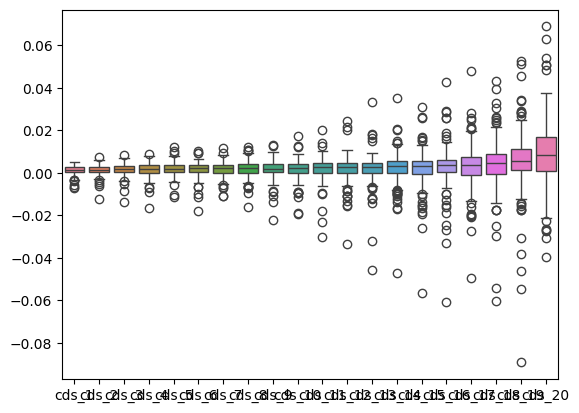

In [11]:
sns.boxplot(data=real_returns)

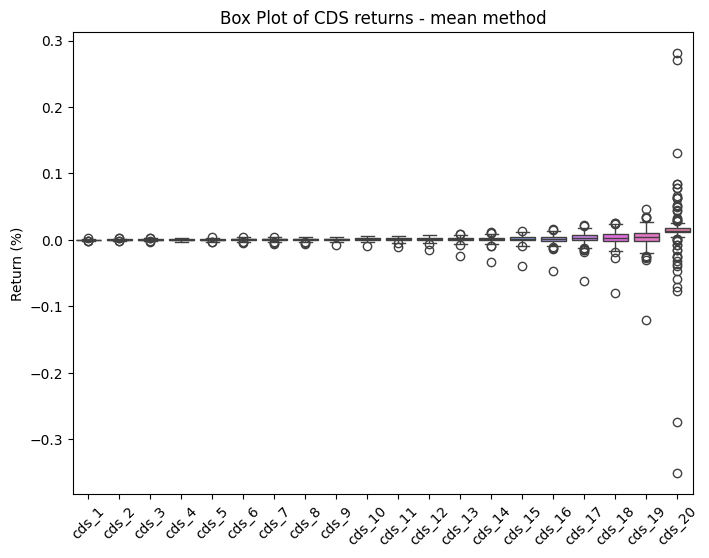

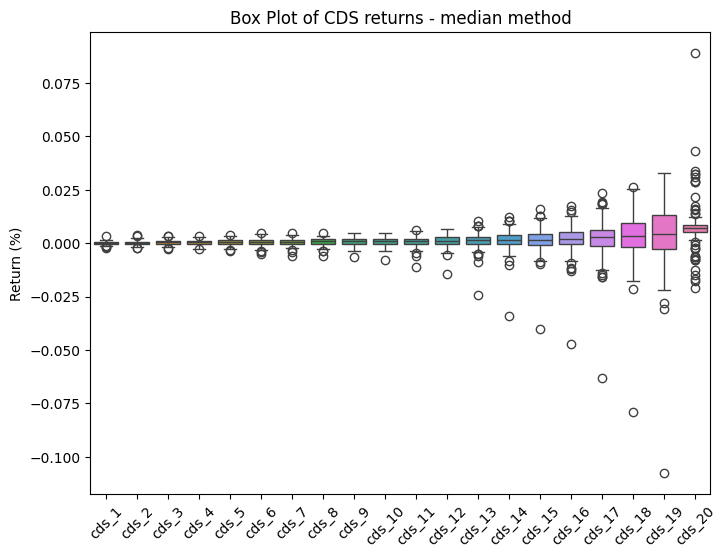

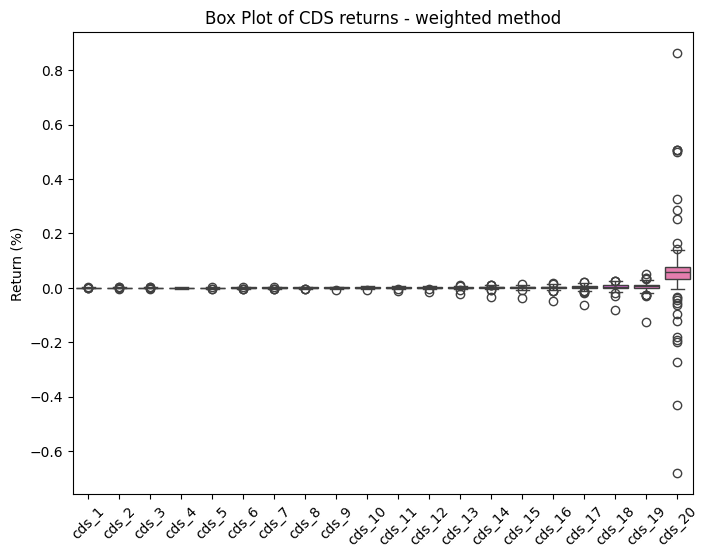

In [12]:
outsample_mean_plot = plot_cds_returns_mean(start_date2, end_date2,Method='mean')
outsample_median_plot = plot_cds_returns_median(start_date2, end_date2,Method='median')
outsample_weighted_plot = plot_cds_returns_weighted(start_date2, end_date2,Method='weighted')

In [13]:
def performance_summary(asset_return, period):
    
    return_index = 1000*(1+asset_return).cumprod() 
    previous_peaks = return_index.cummax() 
    drawdowns = (return_index - previous_peaks)/previous_peaks 
    
    recovery_date = [] 
    for col in return_index.columns: 
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max() 
        recovery_return = pd.DataFrame([return_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_return[recovery_return[col] >= prev_max].index.min())
    
    df = pd.DataFrame({
    'Mean': asset_return.mean() * 12,
    'Volatility': asset_return.std() * np.sqrt(12),
    'Sharpe Ratio': (asset_return.mean() * 12) / (asset_return.std() * np.sqrt(12)),
    'Skewness': asset_return.skew(),
    'Excess Kurtosis': asset_return.kurtosis(),
    'VaR (.05)' : asset_return.quantile(0.05, axis = 0),
    'Max Drawdown' : drawdowns.min(),
    'Peak' : [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns],
    'Bottom' : drawdowns.idxmin(),
    })

    return df

In [14]:
performance_mean_2012 = performance_summary(returns_mean_2012, 12)
performance_median_2012 = performance_summary(returns_median_2012, 12)
performance_weighted_2012 = performance_summary(returns_weighted_2012, 12)
performance_real_2012 = performance_summary(real_returns, 12)

In [15]:
performance_mean_2024 = performance_summary(returns_mean_2024, 12)
performance_median_2024 = performance_summary(returns_median_2024, 12)
performance_weighted_2024 = performance_summary(returns_weighted_2024, 12)

In [16]:
performance_mean_2012

Mean  Volatility  Sharpe Ratio  Skewness  Excess Kurtosis  \
cds_1  -0.002050    0.003194     -0.641864 -0.199498         5.485413   
cds_2  -0.002894    0.005288     -0.547186 -0.297884         4.362205   
cds_3  -0.003485    0.006706     -0.519785  0.214179         4.834298   
cds_4  -0.003998    0.007735     -0.516929  0.566835         4.741043   
cds_5  -0.004553    0.008646     -0.526626  0.514522         3.797270   
cds_6  -0.004989    0.009565     -0.521559  0.278455         3.739262   
cds_7  -0.005596    0.010811     -0.517598  0.416305         5.035905   
cds_8  -0.006361    0.012673     -0.501972  0.404528         6.678719   
cds_9  -0.007260    0.014790     -0.490907  0.139138         3.809257   
cds_10 -0.008391    0.018054     -0.464758  0.182946         5.959704   
cds_11 -0.009603    0.022727     -0.422533  0.554025         8.931683   
cds_12 -0.011149    0.024161     -0.461449  0.393254         5.731971   
cds_13 -0.013064    0.026636     -0.490459  0.492117         4.486295   
cds_14 -0.015852    0.032254     -0.491468  0.330279         3.075295   
cds_15 -0.019278    0.039736     -0.485164  0.350355         5.034571   
cds_16 -0.023540    0.046366     -0.507695  0.546220         4.490270   
cds_17 -0.028816    0.057508     -0.501074  0.562662         5.450481   
cds_18 -0.036720    0.076184     -0.481993  0.385164         5.354752   
cds_19 -0.050044    0.118243     -0.423232  0.237323         6.148155   
cds_20 -0.136440    0.114905     -1.187420  0.989772         7.215152   

        VaR (.05)  Max Drawdown       Peak     Bottom  
cds_1   -0.001378     -0.024034 2001-02-28 2012-10-31  
cds_2   -0.002156     -0.033094 2001-02-28 2012-10-31  
cds_3   -0.003179     -0.040682 2001-02-28 2012-10-31  
cds_4   -0.003240     -0.047839 2001-10-31 2012-10-31  
cds_5   -0.003918     -0.053308 2001-10-31 2012-10-31  
cds_6   -0.004537     -0.058664 2001-09-30 2012-10-31  
cds_7   -0.004632     -0.065674 2001-09-30 2012-10-31  
cds_8   -0.005545     -0.075922 2008-12-31 2012-11-30  
cds_9   -0.007576     -0.092373 2008-12-31 2012-11-30  
cds_10  -0.009138     -0.110814 2008-12-31 2012-11-30  
cds_11  -0.009802     -0.133532 2008-12-31 2012-10-31  
cds_12  -0.011036     -0.152981 2008-12-31 2012-11-30  
cds_13  -0.014750     -0.173795 2008-12-31 2012-11-30  
cds_14  -0.019779     -0.206227 2008-11-30 2012-11-30  
cds_15  -0.019250     -0.251840 2002-10-31 2012-11-30  
cds_16  -0.021305     -0.301291 2002-10-31 2012-11-30  
cds_17  -0.026504     -0.362733 2002-10-31 2012-11-30  
cds_18  -0.032617     -0.436790 2002-10-31 2012-11-30  
cds_19  -0.051525     -0.575461 2009-03-31 2012-11-30  
cds_20  -0.050949     -0.831487 2003-02-28 2012-11-30

In [17]:
performance_real_2012

Mean  Volatility  Sharpe Ratio  Skewness  Excess Kurtosis  \
cds_1   0.013572    0.007643      1.775795 -1.035830         1.971677   
cds_2   0.016225    0.008575      1.892268 -1.506681         6.511058   
cds_3   0.017569    0.009436      1.861905 -1.537075         6.979306   
cds_4   0.016496    0.011026      1.496022 -1.696289         7.059658   
cds_5   0.019859    0.011332      1.752436 -0.600015         2.889687   
cds_6   0.018541    0.012419      1.492913 -1.720115         7.106718   
cds_7   0.018338    0.011952      1.534308 -0.857230         2.050296   
cds_8   0.022124    0.013654      1.620350 -0.863867         3.022371   
cds_9   0.020603    0.015058      1.368219 -1.656655         7.584429   
cds_10  0.017780    0.016616      1.070050 -1.254510         4.950698   
cds_11  0.022707    0.019260      1.178989 -2.077869        10.980006   
cds_12  0.021254    0.022056      0.963630 -1.069361         7.982539   
cds_13  0.022141    0.025714      0.861054 -2.016282        15.988222   
cds_14  0.024482    0.027830      0.879691 -1.291190        10.915951   
cds_15  0.021997    0.032001      0.687385 -1.823244        11.939497   
cds_16  0.033237    0.036523      0.910019 -1.491935        11.420627   
cds_17  0.039135    0.037179      1.052617 -0.552720         5.689092   
cds_18  0.042803    0.045121      0.948623 -1.164741         6.621243   
cds_19  0.060482    0.056368      1.072988 -1.625264         9.695268   
cds_20  0.102963    0.058730      1.753163  0.416882         1.934433   

        VaR (.05)  Max Drawdown       Peak     Bottom  
cds_1   -0.003000     -0.021188 2008-09-30 2011-11-30  
cds_2   -0.002600     -0.018720 2008-08-31 2008-11-30  
cds_3   -0.002395     -0.025018 2008-04-30 2008-12-31  
cds_4   -0.003595     -0.028860 2008-09-30 2008-12-31  
cds_5   -0.003495     -0.029200 2008-07-31 2008-12-31  
cds_6   -0.003590     -0.029618 2007-12-31 2008-11-30  
cds_7   -0.005090     -0.023926 2007-12-31 2008-11-30  
cds_8   -0.004875     -0.027769 2008-07-31 2008-11-30  
cds_9   -0.004790     -0.036090 2008-05-31 2008-11-30  
cds_10  -0.008840     -0.047203 2007-10-31 2009-01-31  
cds_11  -0.004770     -0.056005 2008-07-31 2008-11-30  
cds_12  -0.008495     -0.061844 2008-05-31 2008-11-30  
cds_13  -0.007370     -0.100281 2007-10-31 2008-12-31  
cds_14  -0.009895     -0.090109 2007-10-31 2008-12-31  
cds_15  -0.013555     -0.133536 2007-10-31 2009-02-28  
cds_16  -0.012670     -0.112636 2007-12-31 2008-12-31  
cds_17  -0.013970     -0.131273 2007-10-31 2008-11-30  
cds_18  -0.014090     -0.141005 2007-10-31 2008-11-30  
cds_19  -0.016825     -0.109445 2008-05-31 2008-11-30  
cds_20  -0.019285     -0.071160 2011-04-30 2011-09-30

In [18]:
performance_difference = performance_real_2012 - performance_mean_2012
performance_difference

Mean  Volatility  Sharpe Ratio  Skewness  Excess Kurtosis  \
cds_1   0.015622    0.004449      2.417660 -0.836332        -3.513736   
cds_2   0.019119    0.003287      2.439454 -1.208798         2.148853   
cds_3   0.021054    0.002731      2.381690 -1.751254         2.145008   
cds_4   0.020494    0.003292      2.012951 -2.263124         2.318614   
cds_5   0.024413    0.002686      2.279061 -1.114538        -0.907583   
cds_6   0.023530    0.002854      2.014472 -1.998570         3.367456   
cds_7   0.023934    0.001141      2.051906 -1.273535        -2.985609   
cds_8   0.028485    0.000981      2.122322 -1.268394        -3.656347   
cds_9   0.027863    0.000269      1.859126 -1.795793         3.775173   
cds_10  0.026171   -0.001438      1.534809 -1.437456        -1.009005   
cds_11  0.032310   -0.003468      1.601523 -2.631894         2.048323   
cds_12  0.032403   -0.002106      1.425078 -1.462616         2.250568   
cds_13  0.035205   -0.000922      1.351513 -2.508398        11.501927   
cds_14  0.040333   -0.004424      1.371159 -1.621470         7.840656   
cds_15  0.041276   -0.007735      1.172548 -2.173599         6.904926   
cds_16  0.056777   -0.009843      1.417714 -2.038154         6.930357   
cds_17  0.067951   -0.020329      1.553691 -1.115382         0.238611   
cds_18  0.079523   -0.031063      1.430616 -1.549905         1.266491   
cds_19  0.110526   -0.061876      1.496220 -1.862587         3.547114   
cds_20  0.239404   -0.056175      2.940583 -0.572890        -5.280719   

        VaR (.05)  Max Drawdown      Peak     Bottom  
cds_1   -0.001622      0.002847 2771 days  -336 days  
cds_2   -0.000444      0.014374 2741 days -1431 days  
cds_3    0.000784      0.015664 2618 days -1400 days  
cds_4   -0.000355      0.018978 2526 days -1400 days  
cds_5    0.000423      0.024108 2465 days -1400 days  
cds_6    0.000947      0.029047 2283 days -1431 days  
cds_7   -0.000458      0.041749 2283 days -1431 days  
cds_8    0.000670      0.048153 -153 days -1461 days  
cds_9    0.002786      0.056284 -214 days -1461 days  
cds_10   0.000298      0.063611 -427 days -1399 days  
cds_11   0.005032      0.077526 -153 days -1431 days  
cds_12   0.002541      0.091137 -214 days -1461 days  
cds_13   0.007380      0.073514 -427 days -1430 days  
cds_14   0.009884      0.116118 -396 days -1430 days  
cds_15   0.005695      0.118304 1826 days -1371 days  
cds_16   0.008635      0.188655 1887 days -1430 days  
cds_17   0.012534      0.231460 1826 days -1461 days  
cds_18   0.018527      0.295785 1826 days -1461 days  
cds_19   0.034700      0.466016 -304 days -1461 days  
cds_20   0.031664      0.760327 2983 days  -427 days

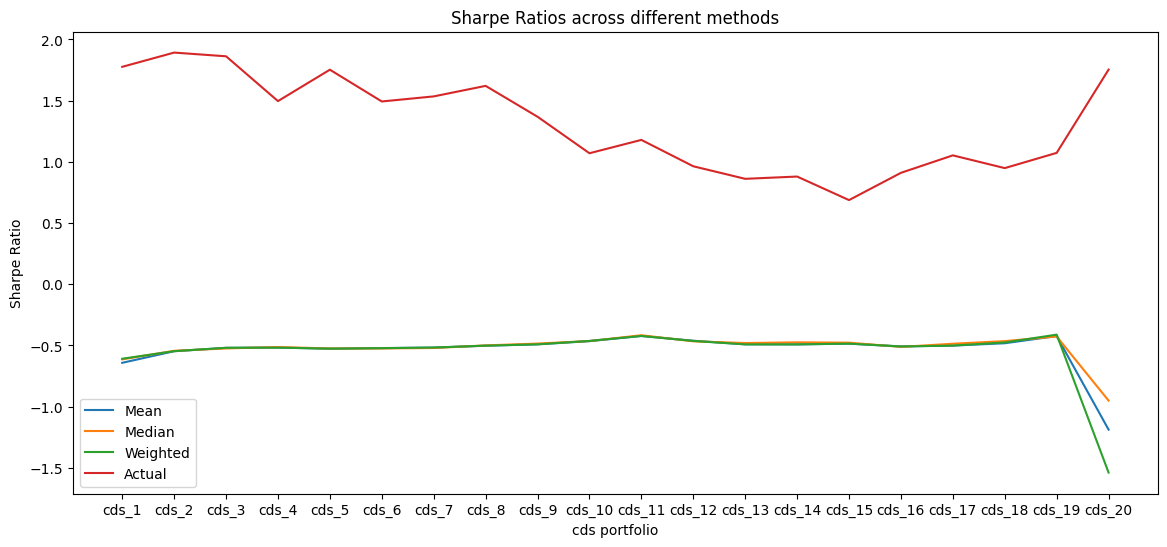

In [19]:
sharpe_ratio_mean = performance_mean_2012['Sharpe Ratio']
sharpe_ratio_median = performance_median_2012['Sharpe Ratio']
sharpe_ratio_weighted = performance_weighted_2012['Sharpe Ratio']
sharpe_ratio_real = performance_real_2012['Sharpe Ratio']

plt.figure(figsize=(14, 6))

plt.plot(sharpe_ratio_mean, label='Mean')
plt.plot(sharpe_ratio_median, label='Median')
plt.plot(sharpe_ratio_weighted, label='Weighted')
plt.plot(sharpe_ratio_real, label='Actual')

plt.title('Sharpe Ratios across different methods')
plt.xlabel('cds portfolio')
plt.ylabel('Sharpe Ratio')
plt.legend()

plt.show()

In [20]:
def plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_1"):
    """
    Plots a line graph of the returns from each of the provided DataFrames based on a specified CDS column name.
    
    Parameters:
    - real_returns (DataFrame): DataFrame containing actual returns indexed by date.
    - returns_mean_2012 (DataFrame): DataFrame containing mean returns for 2012 indexed by date.
    - returns_median_2012 (DataFrame): DataFrame containing median returns for 2012 indexed by date.
    - returns_weighted_2012 (DataFrame): DataFrame containing weighted returns for 2012 indexed by date.
    - cds (str): The column name representing the specific CDS to plot.
    """
    # Ensure the specified CDS column exists in all DataFrames
    for df in [real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012]:
        if cds not in df.columns:
            raise ValueError(f"Column {cds} not found in one of the DataFrames.")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot each DataFrame's specified CDS returns
    plt.plot(real_returns.index, real_returns[cds], label='Real Returns')
    plt.plot(returns_mean_2012.index, returns_mean_2012[cds], label='Mean Returns 2012',linestyle='--')
    plt.plot(returns_median_2012.index, returns_median_2012[cds], label='Median Returns 2012', linestyle='-.')
    plt.plot(returns_weighted_2012.index, returns_weighted_2012[cds], label='Weighted Returns 2012', linestyle=':')
    
    # Labeling
    plt.title(f"Portfolio Returns Comparison for {cds}")
    plt.xlabel("Date")
    plt.ylabel("Returns")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show plot
    plt.show()

In [21]:
real_returns.loc['2009-09-30','cds_1']

-0.0001

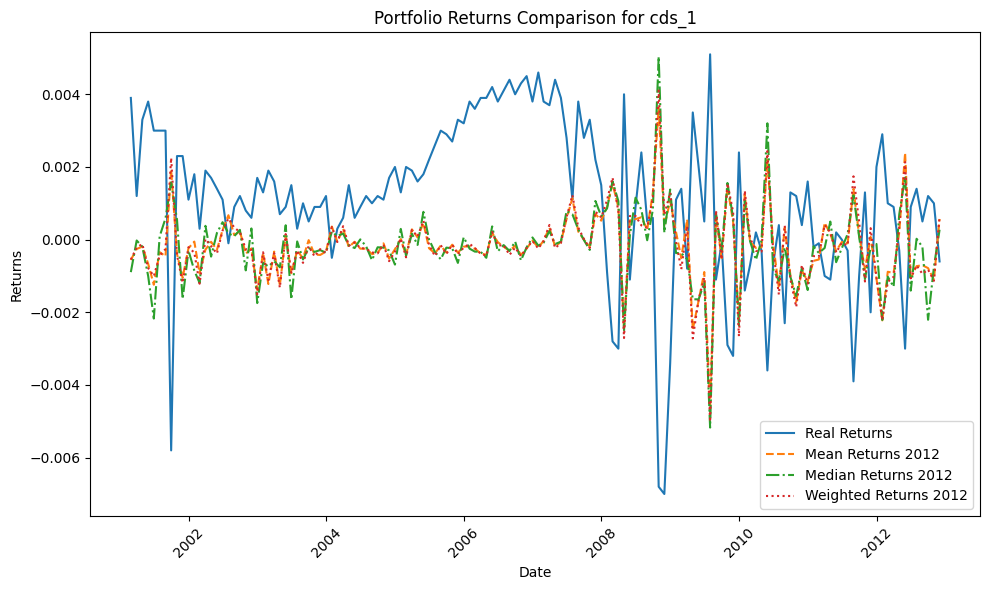

In [22]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_1")

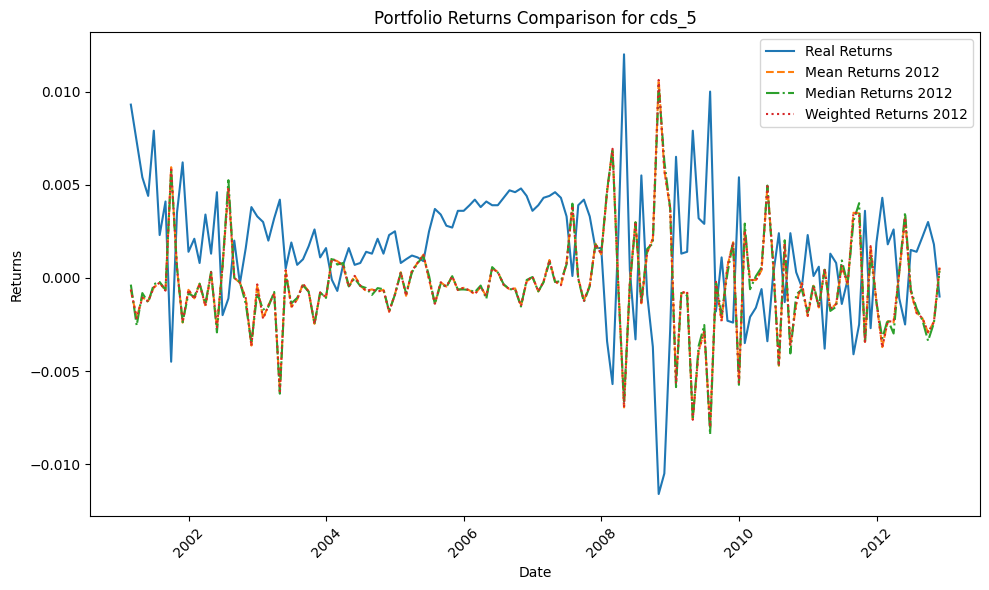

In [23]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_5")

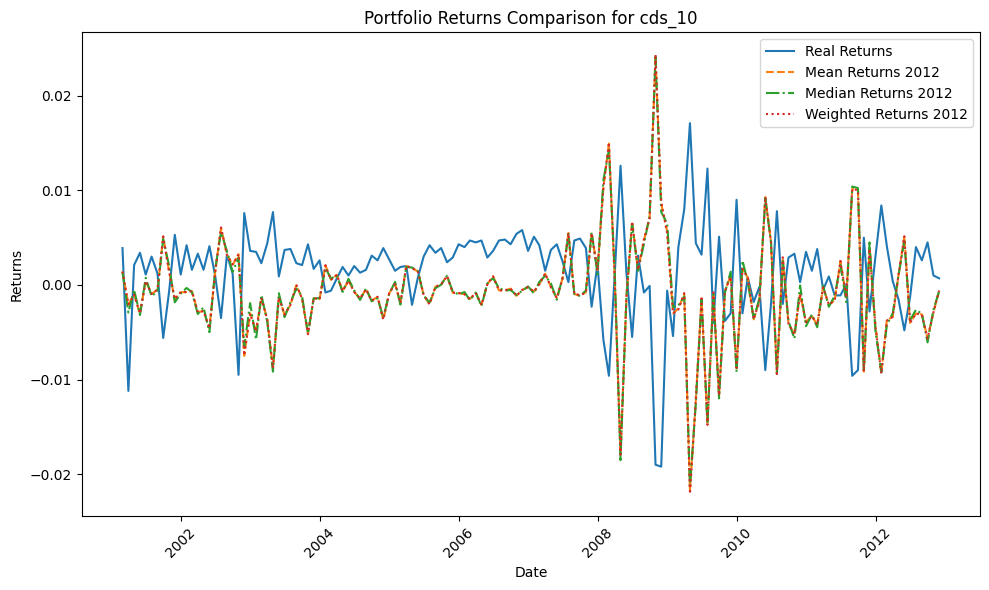

In [24]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_10")

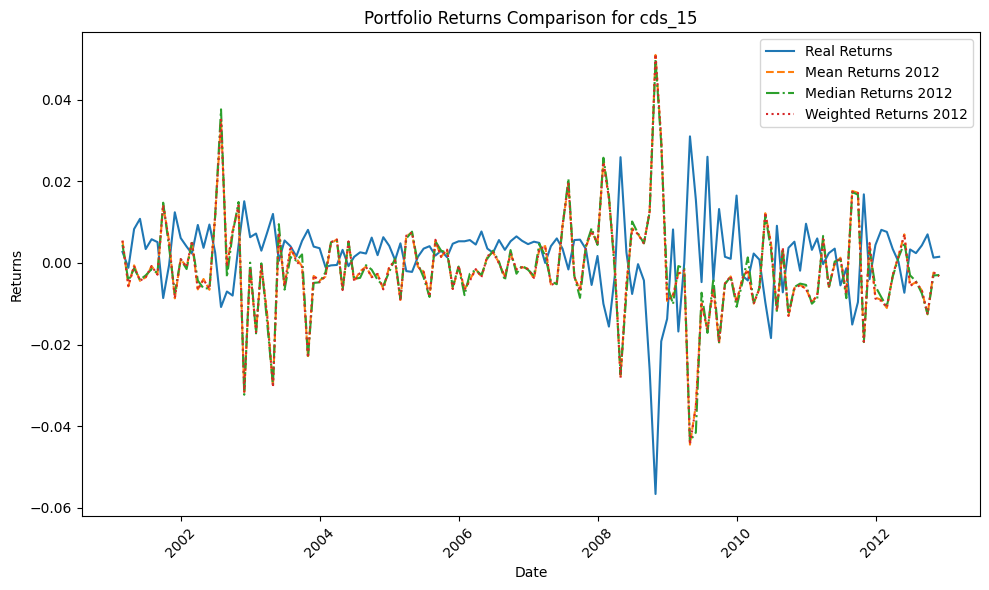

In [25]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_15")

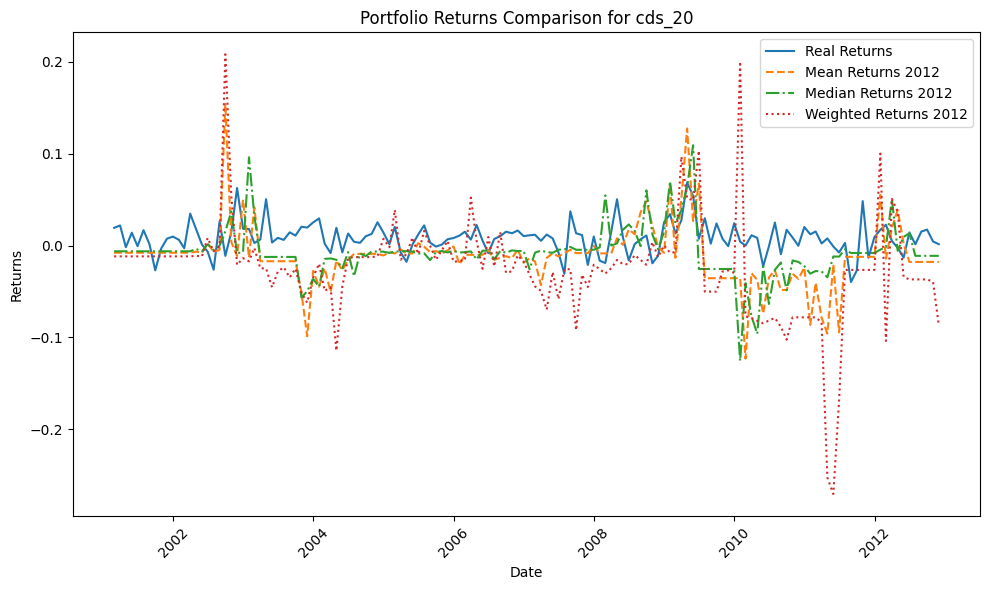

In [26]:
plot_cds_portfolio_returns(real_returns, returns_mean_2012, returns_median_2012, returns_weighted_2012, cds="cds_20")